In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#linear regression: regressione lineare

algoritmo ML che dato il consumo di un auto a benzina ci dice l'emissioni dell'auto. Regressione poichè l'output è un numero

In [14]:
dati=pd.read_csv("./Fuel_Consumption_2000-2022 - Copia.csv")#solo auto a benzima (X)
dati

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 KM),COMB (L/100 KM),COMB (MPG),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,VOLVO,XC40 T5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,VOLVO,XC60 B5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,VOLVO,XC60 B6 AWD,SUV: SMALL,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,VOLVO,XC90 T5 AWD,SUV: STANDARD,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [16]:
dati_np=dati[dati["FUEL"]=="X"][["FUEL CONSUMPTION", "EMISSIONS"]].values#solo queste due colonne
dati_np

array([[  9.2, 186. ],
       [  8.5, 175. ],
       [ 10. , 198. ],
       ...,
       [ 10.6, 222. ],
       [ 11. , 229. ],
       [ 10.7, 217. ]])

- feature: FUEL CONSUMPTION
- target: FUEL
non facciamo lo split perchè lo capiamo dai grafici con l'analisi grafica e r^2

In [17]:
X=dati_np[:,0]
y=dati_np[:, 1]

Text(0, 0.5, 'emissioni CO2')

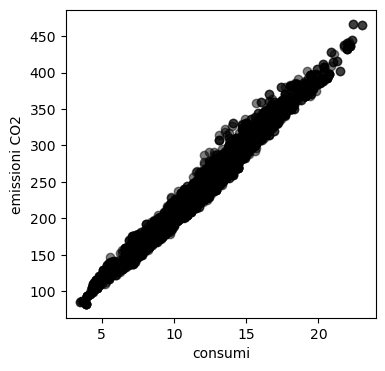

In [21]:
fig, ax=plt.subplots(figsize=(4,4))
ax.scatter(X, y, c="k", alpha=0.5)
ax.set_xlabel("consumi")
ax.set_ylabel("emissioni CO2")
#è possibile fare una regressione perchè l'andamento è riconducibile alla retta

In [24]:
X_norm=(X-np.mean(X))/np.std(X)
y_norm=(y-np.mean(y))/np.std(y)

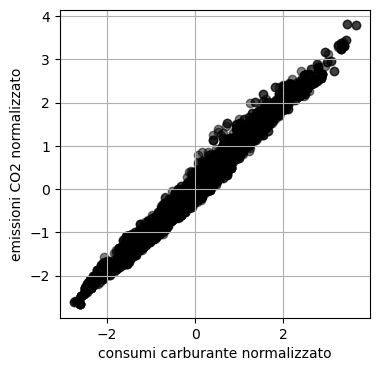

In [28]:
fig, ax=plt.subplots(figsize=(4,4))
ax.scatter(X_norm, y_norm, c="k", alpha=0.5)
ax.set_xlabel("consumi carburante normalizzato")
ax.set_ylabel("emissioni CO2 normalizzato")
ax.grid()
plt.show()

se normalizziamo le feature otteniamo una retta che passa per l'origine e ha un m=1

In [30]:
X_norm[:, np.newaxis]#array di una colonna

array([[-0.88597673],
       [-1.11580616],
       [-0.62331452],
       ...,
       [-0.42631786],
       [-0.29498675],
       [-0.39348508]])

In [31]:
regressione=LinearRegression()
regressione.fit(X_norm[:, np.newaxis], y_norm)#realizza l'apprendimento come la classificazione

LinearRegression()

fit è lo stesso dei modelli di ML, normalmente ha un target y che è un array di numeri se è una gressione e una di classi se è un classificatore e X_norm è una matrice, ma noi abbiamo ua sola variabile. Dobbiamo trasformarlo

In [37]:
print(f"R^2 vale: {regressione.score(X_norm[:, np.newaxis], y_norm):.2f}")#stessi parametri di fit

R^2 vale: 0.98


In [39]:
#calcolo il coefficiente angolare: attributo che restituisce m
m=regressione.coef_
m

array([0.98990009])

mi restituisce un array perchè posso avere più parametri nel caso di un iperpiano

In [41]:
q=regressione.intercept_
q

1.9539097327006396e-16

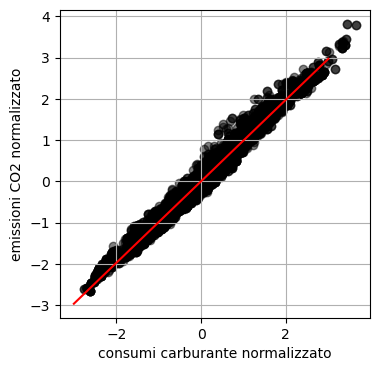

In [46]:
array_x=np.linspace(-3, 3, 100)
array_y=m*array_x+q
fig, ax=plt.subplots(figsize=(4,4))
ax.scatter(X_norm, y_norm, c="k", alpha=0.5)
ax.plot(array_x, array_y, c="r",)

ax.set_xlabel("consumi carburante normalizzato")
ax.set_ylabel("emissioni CO2 normalizzato")
ax.grid()
plt.show()

In [48]:
consumo=6 #emissioni per questo consumo
#la retta l'ho calcolato la feature normalizzata, devo normalizzare anche il consumo
consumo_norm=(consumo- np.mean(X))/np.std(X)
consumo_norm

-1.9366255793192015

In [49]:
emissioni_norm=m*consumo_norm+q
emissioni_norm

array([-1.91706583])

In [54]:
#alternativa: predict
regressione.predict([[consumo_norm]])

array([-1.91706583])

devo fare l'inverso della normalizzazione:

In [55]:
emissioni_norm*np.std(y)+ np.mean(y)

array([126.55090644])

### Regressione senza normalizzare:


In [56]:
regressione_no_norm=LinearRegression()
regressione_no_norm.fit(X[:, np.newaxis], y)

LinearRegression()

In [57]:
print(f"R^2 vale: {regressione_no_norm.score(X[:, np.newaxis], y):.2f}")#stessi parametri di fit

R^2 vale: 0.98


In [60]:
m_no_norm=regressione_no_norm.coef_
m_no_norm

array([19.28130306])

In [61]:
q_no_norm=regressione_no_norm.intercept_
q_no_norm

10.863088097226836

emissioni si possono approssimate
$e=19,28*c+10,86$ le emissioni dipendono dai consumi secondo questa formula

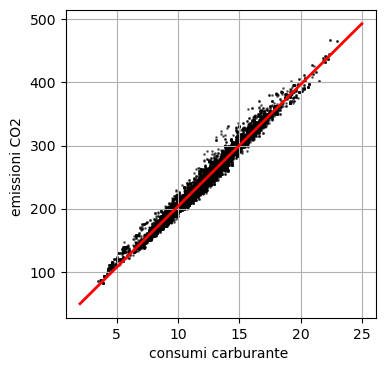

In [67]:
array_x=np.linspace(2, 25, 100)
array_y=m_no_norm*array_x+q_no_norm
fig, ax=plt.subplots(figsize=(4,4))
ax.scatter(X, y, c="k", alpha=0.5, s=1)
ax.plot(array_x, array_y, c="r",linewidth=2)

ax.set_xlabel("consumi carburante ")
ax.set_ylabel("emissioni CO2 ")
ax.grid()
plt.show()